In [55]:
%reset

In [56]:
# 加载所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

np.random.seed(2022)

In [76]:
#参数
I = np.arange(10)
delta = 0.1
alpha = 0.05
mu = np.arange(1,11)/10
sigma = np.power(np.arange(1,11),0.5)
k = len(I)
#Paulson
Lambda = delta/2
a = np.log((k-1)/alpha)*1/(delta-Lambda)
#KN
n_0 = 100
eta =  (np.power(2*alpha/(k-1),-2/(n_0-1)) - 1)/2
h_squire = 2*eta*(n_0-1)
#样本方差
S_squire = pd.DataFrame(index=range(10),columns=range(10))

In [91]:
def Paulson_KN():
    #初始化采样n_0个，用以计算样本均值与样本方差
    X_Initialization = pd.DataFrame()
    for i in I:
        x = np.random.normal(loc=mu[i],scale=sigma[i],size=n_0)
        x = pd.DataFrame(x).T
        X_Initialization = pd.concat([X_Initialization,x])
    X_Initialization.index = I
    #计算样本均值与样本方差
    for i in I:
        x_i = X_Initialization.loc[i]
        for l in I:
            x_l = X_Initialization.loc[l]
            x_il = x_i-x_l
            s_il = np.var(x_il,ddof=1)
            S_squire.loc[i,l] = s_il
        s_ii = np.var(x_i,ddof=1)
        S_squire.loc[i,i] = s_ii
    S_diagnoal = np.power(np.diagonal(S_squire),0.5)
    X_bar = np.mean(X_Initialization,axis=1)
    #Paulson算法
    I_Paulson = I.copy()
    r_Paulson = 0
    X_Paulson = pd.DataFrame(index=range(10))
    while len(I_Paulson)>1 :
        r_Paulson += 1
        X_Paulson[r_Paulson]=\
            np.random.normal(loc=mu,scale = sigma)/S_diagnoal + X_bar*(1-1/S_diagnoal)
        X_bar_r = np.mean(X_Paulson,axis=1)
        I_old = I_Paulson.copy()
        I_Paulson = list()
        for l in I_old:
            if X_bar_r[l] >= max(X_bar_r)-max(0,a/r_Paulson-Lambda):
                I_Paulson.append(l)
    #KN算法
    I_KN = I.copy()
    r_KN = 0
    X_KN = pd.DataFrame(index=range(10))
    while len(I_KN)>1 :
        r_KN += 1
        X_KN[r_KN]=np.random.normal(loc=mu,scale = sigma)
        X_bar_r = np.mean(X_KN,axis=1)
        I_old = I_KN.copy()
        I_KN = list()
        for i in I_old:
            keep_i = True
            for l in I_old:
                W_il_r = max(0,
                             delta/(2*r_KN)*(h_squire*S_squire.loc[i,l]/np.power(delta,2)-r_KN))
                if not X_bar_r[i]>=X_bar_r[l]-W_il_r:
                    keep_i = False
            if keep_i:
                I_KN.append(i)
    #输出最终结果与循环次数
    return I_KN[0],r_KN,I_Paulson[0],r_Paulson

In [92]:
result = pd.DataFrame()
for i in range(100):
    print(i)
    once = Paulson_KN()
    once = pd.DataFrame(once)
    result[i] = once


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 98.]),
 array([8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ]),
 <BarContainer object of 10 artists>)

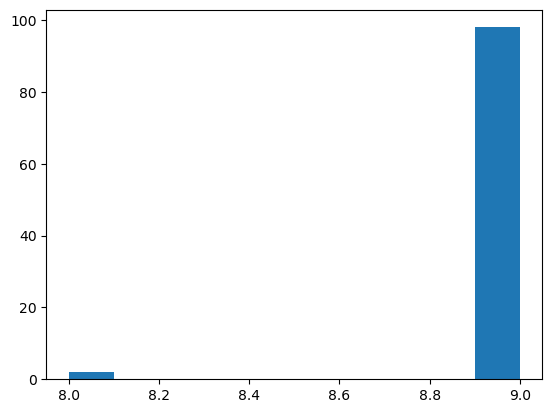

In [94]:
plt.hist(result.loc[0])


(array([12., 13., 18., 21., 15.,  8.,  2.,  5.,  2.,  4.]),
 array([ 2587. ,  3555.6,  4524.2,  5492.8,  6461.4,  7430. ,  8398.6,
         9367.2, 10335.8, 11304.4, 12273. ]),
 <BarContainer object of 10 artists>)

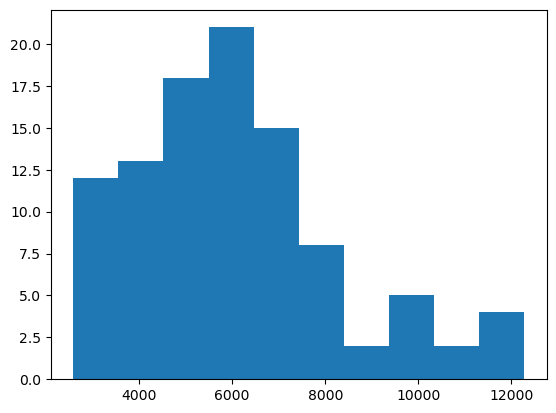

In [95]:
plt.hist(result.loc[1])


(array([ 1.,  0.,  1.,  0.,  0., 16.,  0., 29.,  0., 53.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 10 artists>)

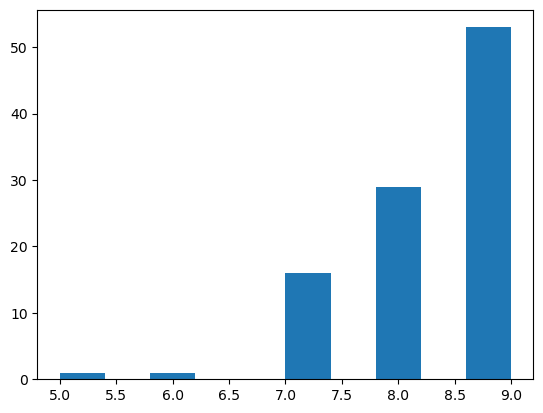

In [96]:
plt.hist(result.loc[2])


(array([26., 18., 14., 10.,  9.,  6.,  3.,  4.,  8.,  2.]),
 array([ 146. ,  312.8,  479.6,  646.4,  813.2,  980. , 1146.8, 1313.6,
        1480.4, 1647.2, 1814. ]),
 <BarContainer object of 10 artists>)

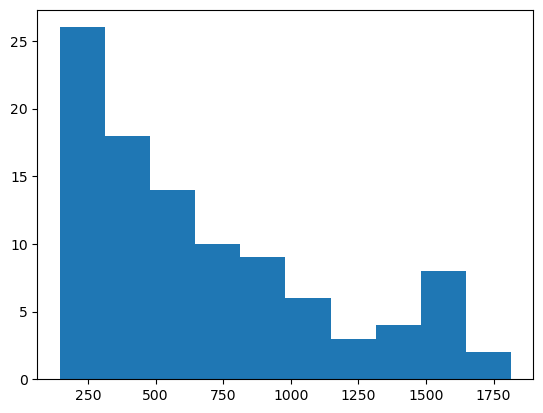

In [97]:
plt.hist(result.loc[3])


In [98]:
import pickle
def save_variable(v,filename):
    f=open(filename,'wb')
    pickle.dump(v,f)
    f.close()
    return filename

def load_variavle(filename):
    f=open(filename,'rb')
    r=pickle.load(f)
    f.close()
    return r



In [ ]:
filename = save_variable(result,'/Users/murphy/Documents/GitHub/Stochastic-Simulation/HW4/results.txt')

In [99]:
results = load_variavle('/Users/murphy/Documents/GitHub/Stochastic-Simulation/HW4/results.txt')
